# Project 2: ShopEasy

## Import the libraries

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## About the dataset

This dataset is collected by ShopEasy, a leading e-commerce platform that offers a diverse range of products. The primary objective of this dataset is to enable ShopEasy to gain a deeper understanding of their customers' buying habits and behaviors, with the ultimate goal of enhancing the user shopping experience through personalization and targeted promotions.

The dataset includes a variety of features that capture the shopping activities and preferences of ShopEasy's users. These features encompass both financial and behavioral aspects of shopping, ranging from total amount spent to shopping frequency and methods of payment. Each record in the dataset represents an individual user.

In [164]:
# Load the dataset
shopeasy_df = pd.read_csv('shopEasy.csv')

# Display the first five rows of the dataframe
shopeasy_df.head()

personId  accountTotal  frequencyIndex  itemCosts  singleItemCosts  \
0   C10573   1034.660626        0.833333    1308.11          1308.11   
1   C16889    777.853474        0.666667       0.00             0.00   
2   C12964     97.453056        0.818182     334.73           334.73   
3   C11171      0.000000        0.000000      12.65             0.00   
4   C17582     18.120946        0.500000      57.00            57.00   

   multipleItemCosts  emergencyFunds  itemBuyFrequency  \
0               0.00      234.602843          0.500000   
1               0.00     1820.143378          0.000000   
2               0.00       19.551802          0.083333   
3              12.65        0.000000          0.083333   
4               0.00        0.000000          0.166667   

   singleItemBuyFrequency  multipleItemBuyFrequency  ...  emergencyCount  \
0                0.500000                  0.000000  ...               1   
1                0.000000                  0.000000  ...               8   
2                0.083333                  0.000000  ...               1   
3                0.000000                  0.083333  ...               0   
4                0.166667                  0.000000  ...               0   

   itemCount  maxSpendLimit  monthlyPaid  leastAmountPaid  \
0          8         1500.0   236.764555       207.007715   
1          0         2000.0    89.741508       173.276205   
2          1         2500.0   234.271939       117.297542   
3          1         5000.0     0.000000              NaN   
4          1         1500.0   118.438703        54.138711   

   paymentCompletionRate  accountLifespan     location accountType webUsage  
0                   0.00                6     New York     Premium       60  
1                   0.00                6  Los Angeles     Premium        5  
2                   0.25               12     New York     Student       21  
3                   0.00               12      Chicago     Premium       53  
4                   0.00                6     New York     Premium       59  

[5 rows x 21 columns]

### Dataset features:

## Cleaning the data

'personId' is the unique identifier for each customer. We exclude the 'personId' column because it doesn't hold meaningful information for the analysis or predictive modeling and can potentially lead to  to misleading results or overfitting.

In [165]:
# Drop the 'personId' column
shopeasy_df.drop('personId', axis=1, inplace=True)

In [166]:
# Count NaN values
missing_values = shopeasy_df.isnull().sum()

# Display the count of NaN values for each column
print('Missing Values Summary:')
print(missing_values)

Missing Values Summary:
accountTotal                  0
frequencyIndex                0
itemCosts                     0
singleItemCosts               0
multipleItemCosts             0
emergencyFunds                0
itemBuyFrequency              0
singleItemBuyFrequency        0
multipleItemBuyFrequency      0
emergencyUseFrequency         0
emergencyCount                0
itemCount                     0
maxSpendLimit                 1
monthlyPaid                   0
leastAmountPaid             313
paymentCompletionRate         0
accountLifespan               0
location                      0
accountType                   0
webUsage                      0
dtype: int64


The 'maxSpendLimit' and 'leastAmountPaid' columns have respectively 1 and 313 missing values.

## Handling missing values

Using the mean is a common statistical method to fill in missing data. Before using the mean, we check for outliers in the 'maxSpendLimit' and 'leastAmountPaid' data, as they can skew the mean. Indeed in a skewed distribution, the mean tends to be pulled in the direction of the skew while the median remains more centrally located.


We use box plots because they highlight outliers and the symmetry or skewness of the data in a concise manner. 

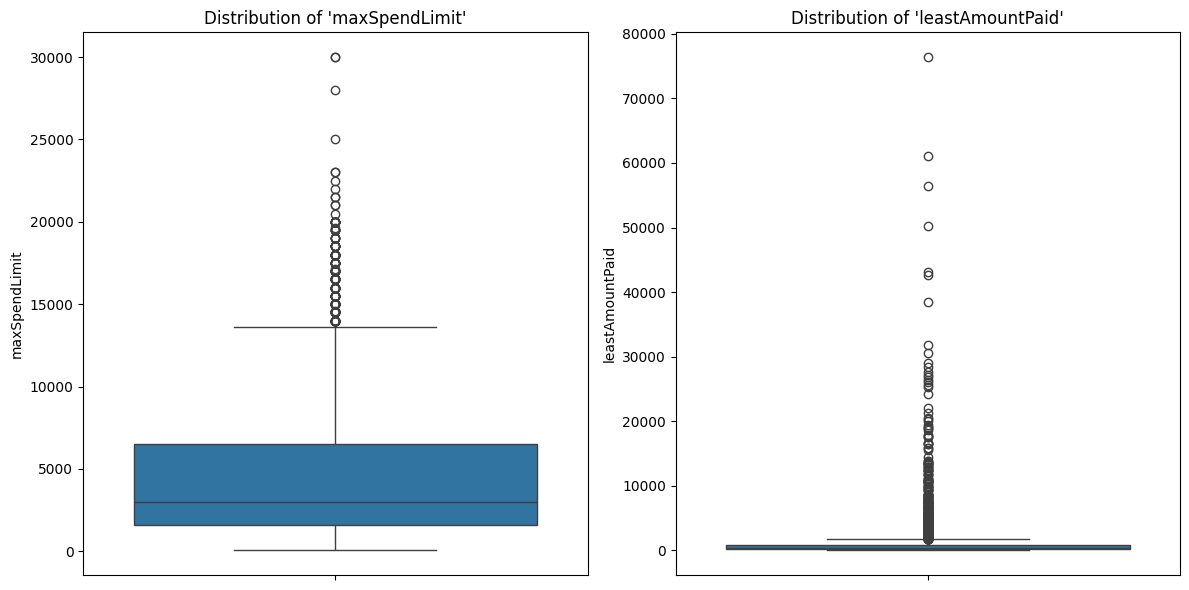

In [167]:
plt.figure(figsize=(12, 6))

# Distribution of 'maxSpendLimit'
plt.subplot(1, 2, 1)
sns.boxplot(y=shopeasy_df['maxSpendLimit'])
plt.title("Distribution of 'maxSpendLimit'")

# Distribution of 'leastAmountPaid'
plt.subplot(1, 2, 2)
sns.boxplot(y=shopeasy_df['leastAmountPaid'])
plt.title("Distribution of 'leastAmountPaid'")

plt.tight_layout()
plt.show()


'maxSpendLimit': the plot shows a few outliers on the higher end with the median centrally located. The distribution is relatively symmetric and there is no significant skewness.

'leastAmountPaid': the plot shows a significant number of outliers on the higher end with the median positioned towards the lower values. The distribution is right-skewed with a heavy concentration of values at the lower end and a long tail towards higher values. The skewness is quite pronounced.

For imputing the missing value in 'maxSpendLimit' both the mean and the median are suitable but, given the presence of outliers, the median is slightly more appropriate.

In [168]:
# Substitute with the median
shopeasy_df['maxSpendLimit'].fillna(shopeasy_df['maxSpendLimit'].median(), inplace=True)

For imputing the missing values in 'leastAmountPaid' we use a more tailored approach:
- where 'itemCount' is 0: substitute with 0, as no transaction implies no payment;
- where 'itemCount' is 1: substitute with the corresponding 'singleItemCosts';
- for the rest: substitute with the median, given the right-skewed distribution and the presence of high-end outliers.


In [169]:
# Substitute with 0 where 'itemCount' is 0
shopeasy_df.loc[shopeasy_df['itemCount'] == 0, 'leastAmountPaid'] = 0

# Substitute with 'singleItemCosts' where 'itemCount' is 1
shopeasy_df.loc[shopeasy_df['itemCount'] == 1, 'leastAmountPaid'] = shopeasy_df['singleItemCosts']

# Substitute with the median for the rest
median_leastamountpaid = shopeasy_df['leastAmountPaid'].median()
shopeasy_df['leastAmountPaid'].fillna(median_leastamountpaid, inplace=True)


In [170]:
# Count NaN values after imputation
missing_values_after_imputation = shopeasy_df.isnull().sum()

# Display the count of NaN values for each column
print('Missing Values After Imputation Summary:')
print(missing_values_after_imputation)

Missing Values After Imputation Summary:
accountTotal                0
frequencyIndex              0
itemCosts                   0
singleItemCosts             0
multipleItemCosts           0
emergencyFunds              0
itemBuyFrequency            0
singleItemBuyFrequency      0
multipleItemBuyFrequency    0
emergencyUseFrequency       0
emergencyCount              0
itemCount                   0
maxSpendLimit               0
monthlyPaid                 0
leastAmountPaid             0
paymentCompletionRate       0
accountLifespan             0
location                    0
accountType                 0
webUsage                    0
dtype: int64


There are no missing values

# Univariate Analysis

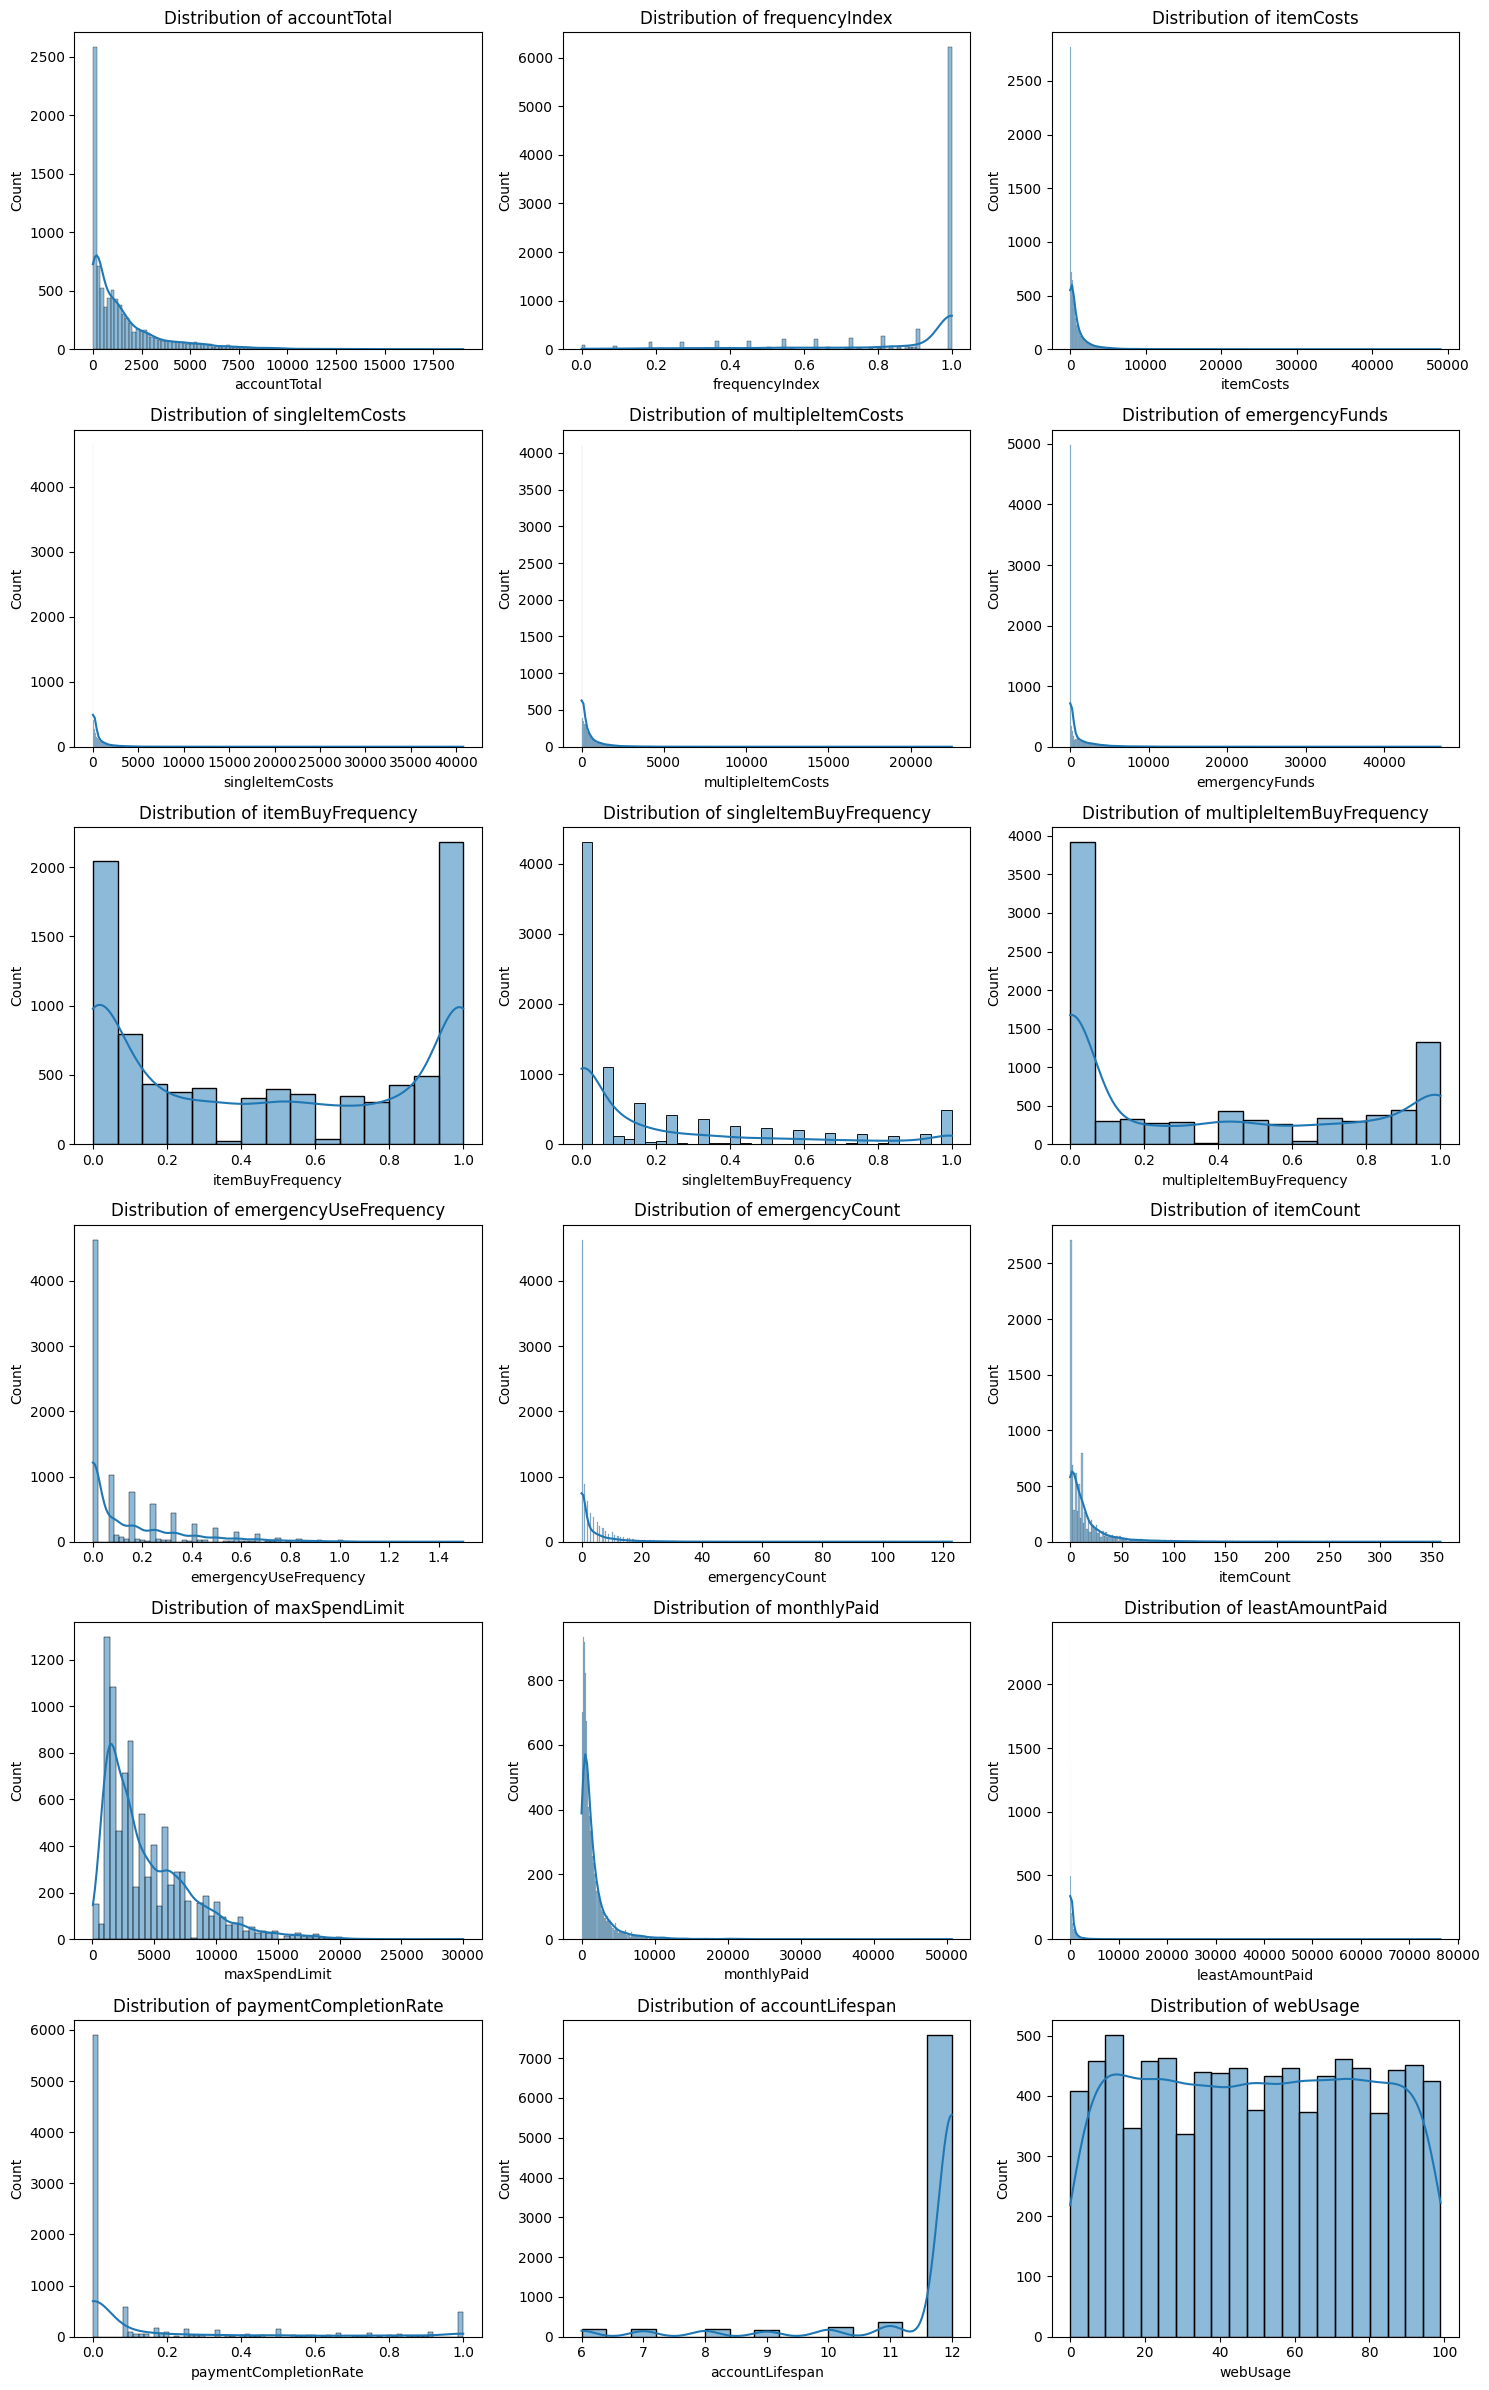

In [171]:
# Select numerical features
numerical_features = shopeasy_df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows/columns for the subplot grid
num_features = len(numerical_features)
ncols = 3
nrows = num_features // ncols + (num_features % ncols > 0)

# Create subplots
plt.figure(figsize=(15, nrows * 4))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(shopeasy_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

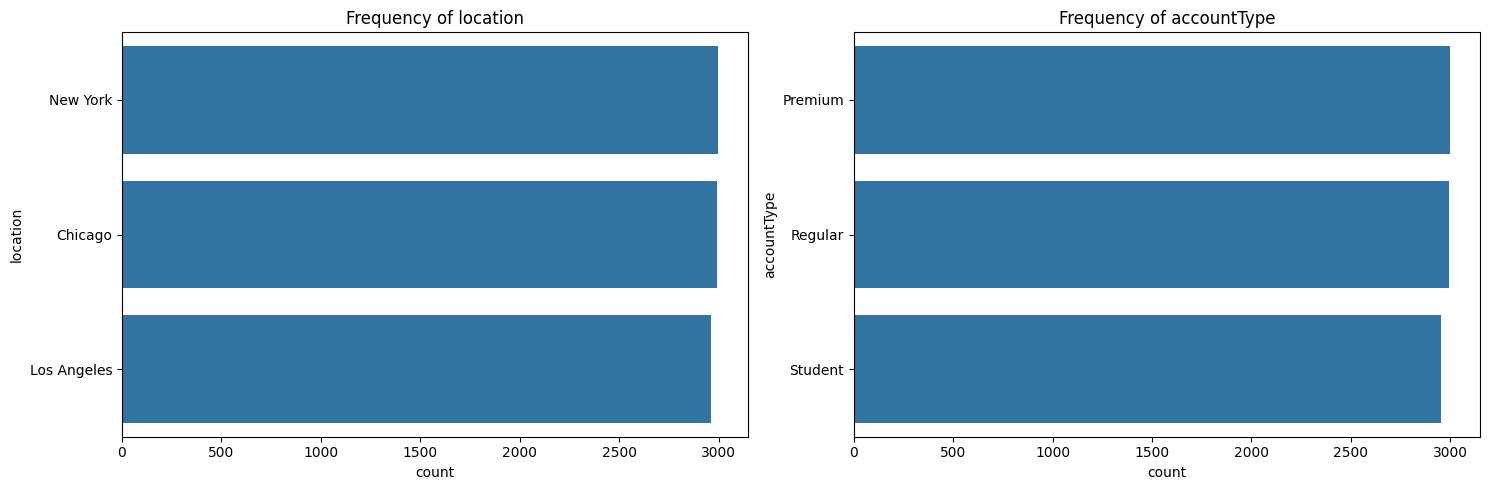

In [172]:
# Select categorical features
categorical_features = ['location', 'accountType'] 

# Determine the number of rows/columns for the subplot grid
ncols = 2
nrows = len(categorical_features) // ncols + (len(categorical_features) % ncols > 0)

# Create subplots
plt.figure(figsize=(15, nrows * 5))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(nrows, ncols, i)
    sns.countplot(y=column, data=shopeasy_df, order=shopeasy_df[column].value_counts().index)
    plt.title(f'Frequency of {column}')
    
plt.tight_layout()
plt.show()


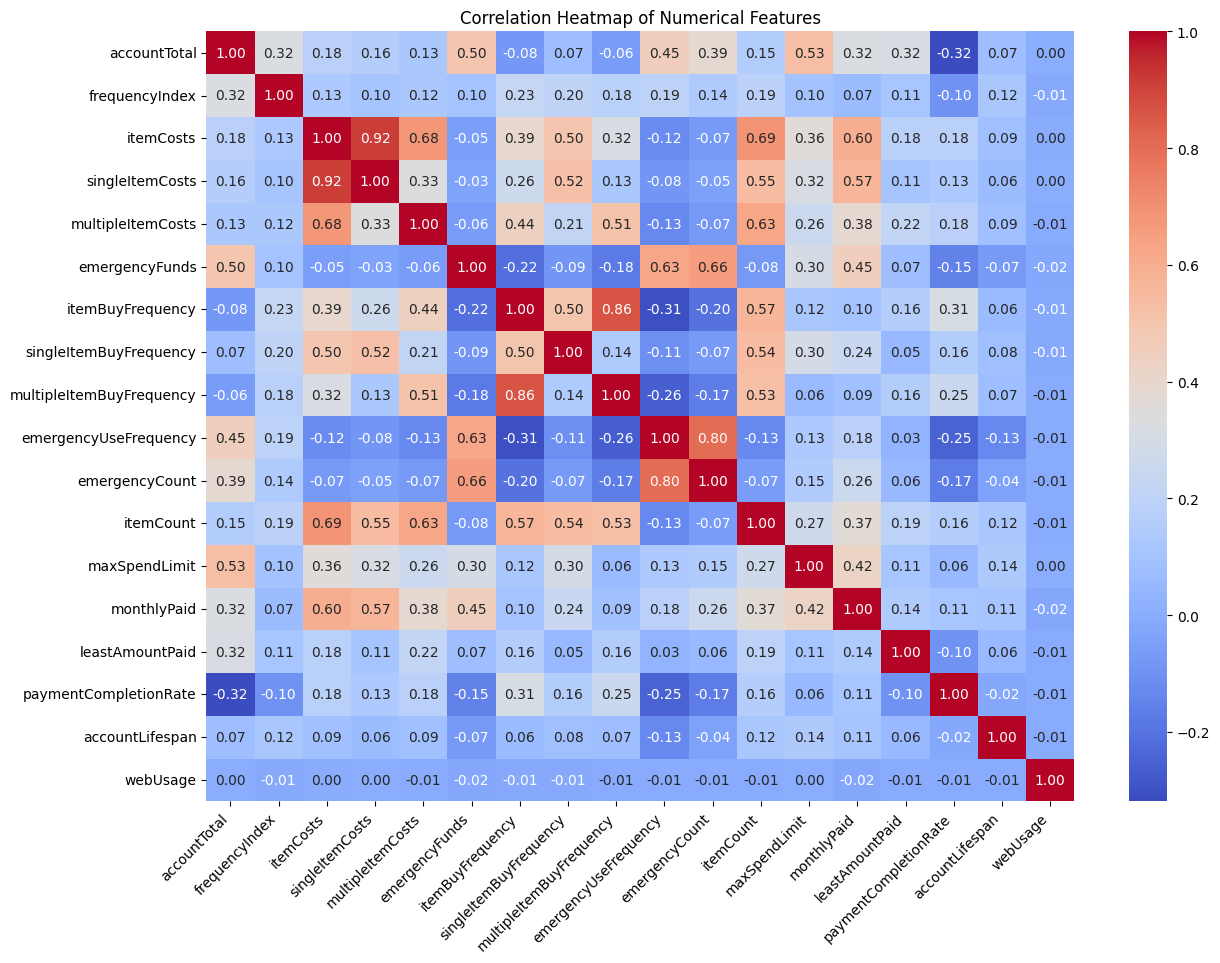

In [173]:
# Create numerical features dataframe
numerical_df = shopeasy_df.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap of Numerical Features
plt.figure(figsize=(14, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Analyzing High Correlations

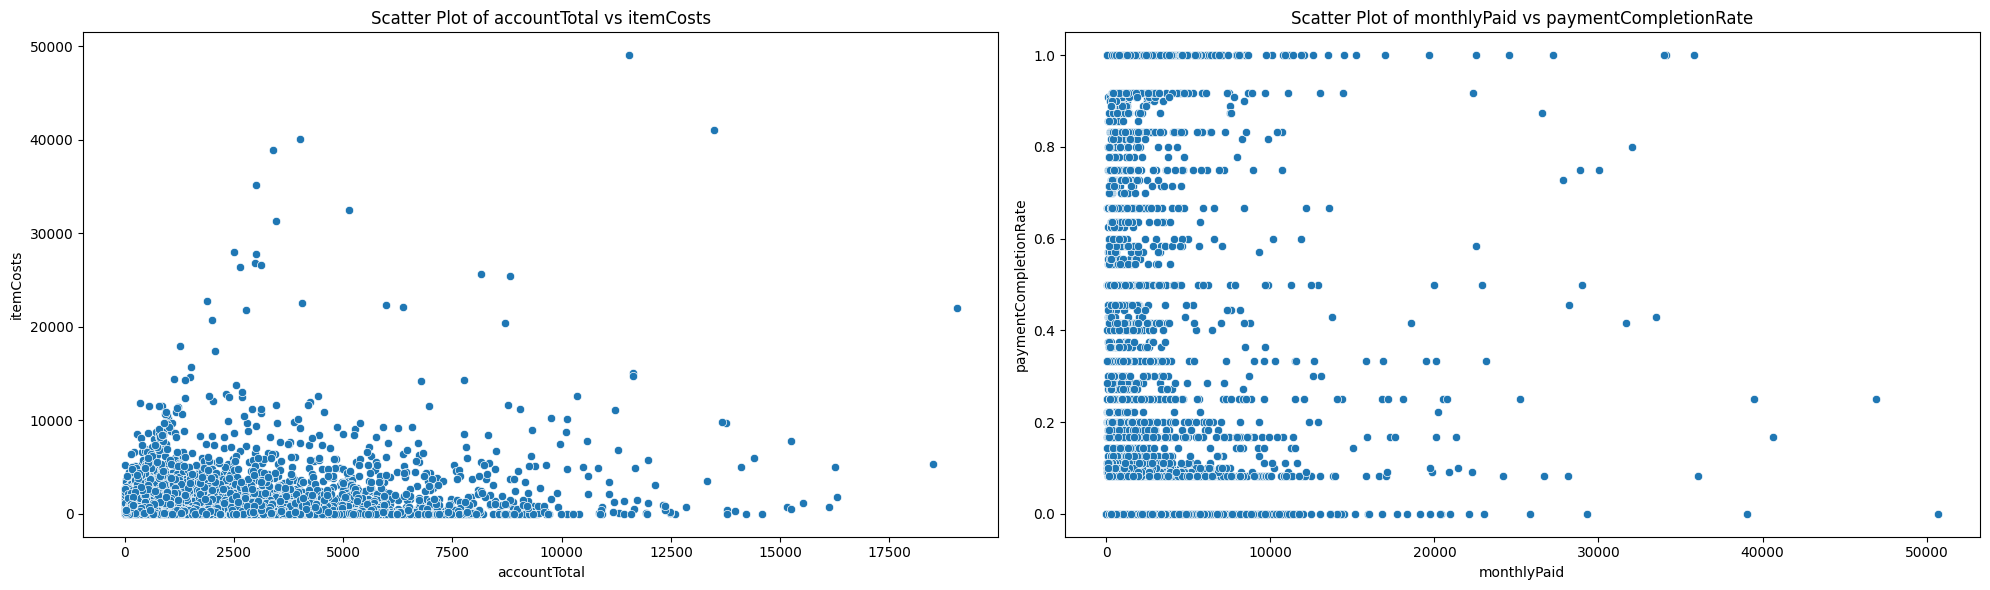

In [174]:
# Sample pairs of features with high correlations
high_corr_pairs = [('accountTotal', 'itemCosts'), ('monthlyPaid', 'paymentCompletionRate')]

# Determine the number of rows/columns for the subplot grid
num_pairs = len(high_corr_pairs)
ncols = 2
nrows = num_pairs // ncols + (num_pairs % ncols > 0)  # Calculate the number of rows

# Creating subplots for scatter plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 6*nrows))

axs = axs.reshape(nrows, ncols)

for i, pair in enumerate(high_corr_pairs):
    row = i // ncols
    col = i % ncols
    sns.scatterplot(data=shopeasy_df, x=pair[0], y=pair[1], ax=axs[row, col])
    axs[row, col].set_title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    axs[row, col].set_xlabel(pair[0])
    axs[row, col].set_ylabel(pair[1])

plt.tight_layout()
plt.show()

Observation: There's a positive correlation between these two variables, as expected. Customers who have a higher total spend on ShopEasy tend to also have higher individual item costs.
Reasoning: This correlation is logical because customers who make more expensive purchases will naturally contribute more to their total spending over time.
EDA Action: We could segment users based on their spending patterns to identify high-value customers or analyze the types of items that contribute most to higher spending.

Observation: There's a wide distribution of monthly payments, but the payment completion rate is often 0 or 1, indicating that many users either pay off their purchases in full or not at all in any given month.
Reasoning: This might suggest that some users prefer to pay in installments, while others pay in full, which could be indicative of different financial behaviors or preferences.
EDA Action: Investigate the characteristics of users who have high monthly payments with different completion rates to understand if there are distinct financial behavior patterns.

# Surprising Correlations

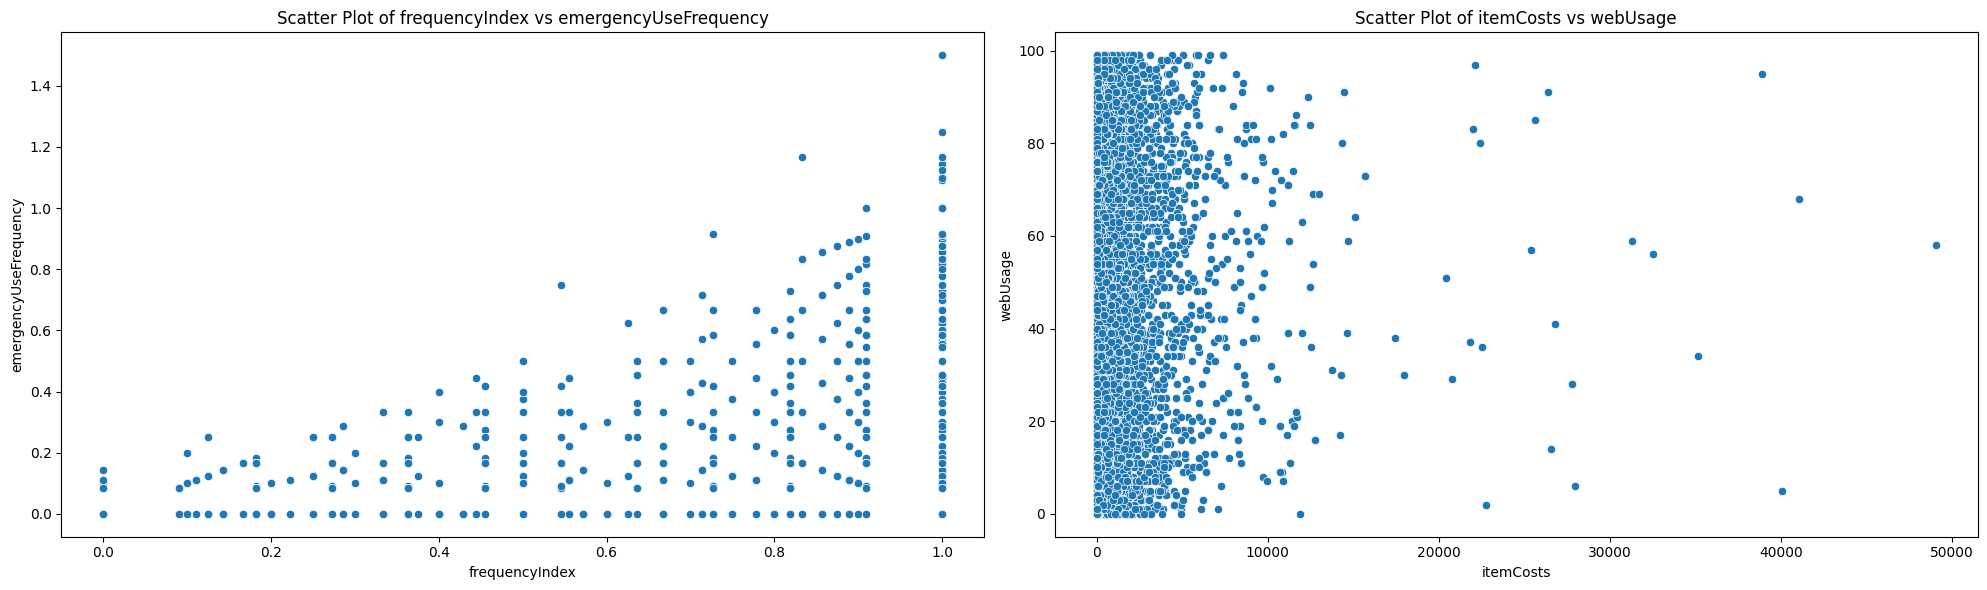

In [175]:
# Sample pairs of features with surprising correlations
surprising_corr_pairs = [('frequencyIndex', 'emergencyUseFrequency'), ('itemCosts', 'webUsage')]

# Determine the number of rows/columns for the subplot grid
num_pairs = len(surprising_corr_pairs)
ncols = 2 

# Determine the number of rows/columns for the subplot grid
nrows = num_pairs // ncols + (num_pairs % ncols > 0)

# Create subplots for scatter plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 6*nrows))
axs = axs.reshape(nrows, ncols)

for i, pair in enumerate(surprising_corr_pairs):
    row = i // ncols
    col = i % ncols
    sns.scatterplot(data=shopeasy_df, x=pair[0], y=pair[1], ax=axs[row, col])
    axs[row, col].set_title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    axs[row, col].set_xlabel(pair[0])
    axs[row, col].set_ylabel(pair[1])

plt.tight_layout()
plt.show()

Observation: The scatter plot doesn't show a strong linear relationship, which is surprising given that one might expect frequent shoppers to use emergency funds more often.
Reasoning: This could indicate that emergency funds are not directly related to shopping frequency but to other factors like financial planning or unexpected needs.

Observation: There doesn't appear to be a strong relationship between the cost of items purchased and web usage. This suggests that frequent web users are not necessarily spending more per item.
Reasoning: This might imply that web usage is a separate behavioral trait and doesn't influence the type or cost of items purchased.

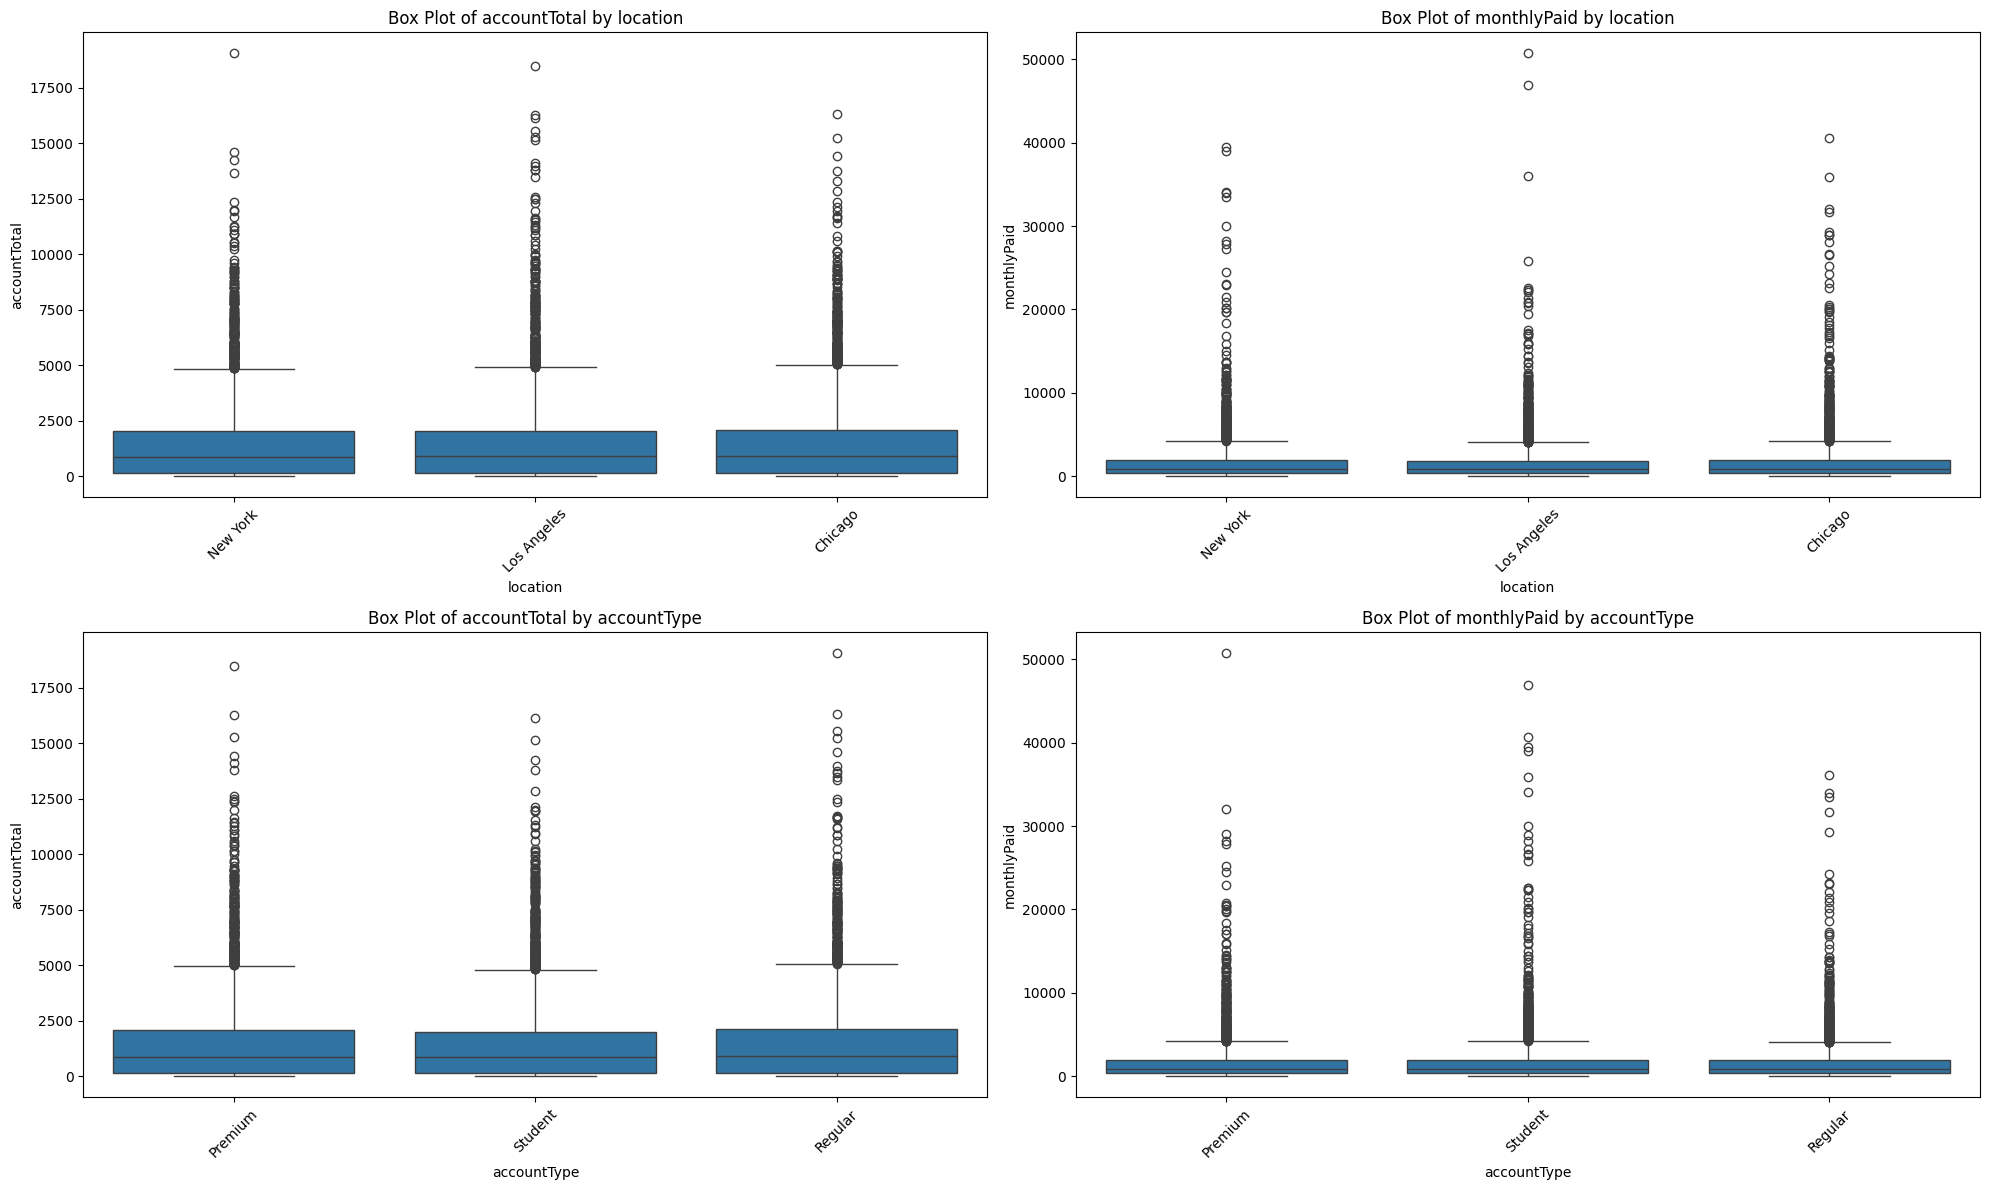

In [176]:
# Features to explore against categorical variables
numerical_features = ['accountTotal', 'monthlyPaid']
categorical_features = ['location', 'accountType']

num_plots = len(numerical_features) * len(categorical_features)
ncols = 2
nrows = num_plots // ncols + (num_plots % ncols > 0)

# Create subplots for box plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 6*nrows))

for i, (cat_feature, num_feature) in enumerate(product(categorical_features, numerical_features)):
    row = i // ncols
    col = i % ncols
    sns.boxplot(x=cat_feature, y=num_feature, data=shopeasy_df, ax=axs[row, col])
    axs[row, col].set_title(f'Box Plot of {num_feature} by {cat_feature}')
    axs[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


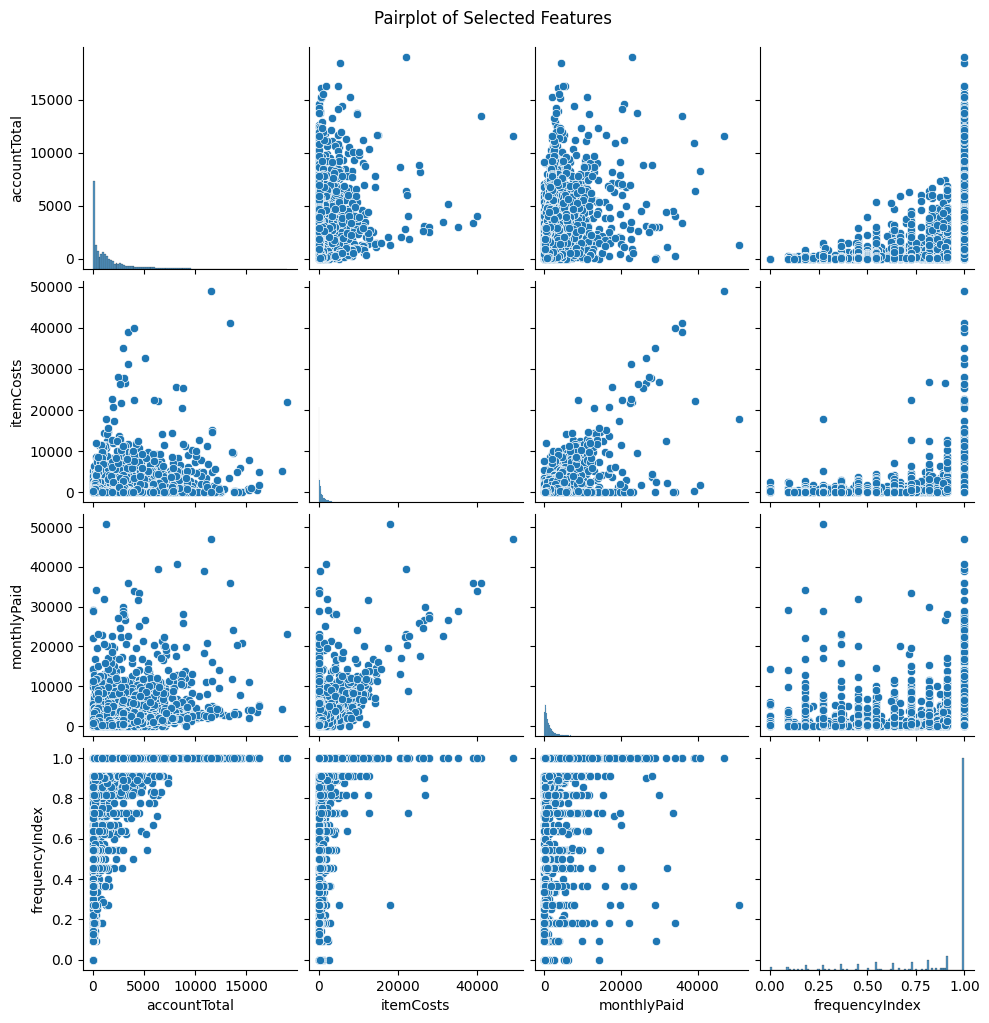

In [177]:
# Selected features for pairplots
selected_features_for_pairplot = ['accountTotal', 'itemCosts', 'monthlyPaid', 'frequencyIndex']

# Create pairplots
sns.pairplot(shopeasy_df[selected_features_for_pairplot])
plt.suptitle('Pairplot of Selected Features', y=1.02)  # Adjust y for the title to display correctly
plt.show()


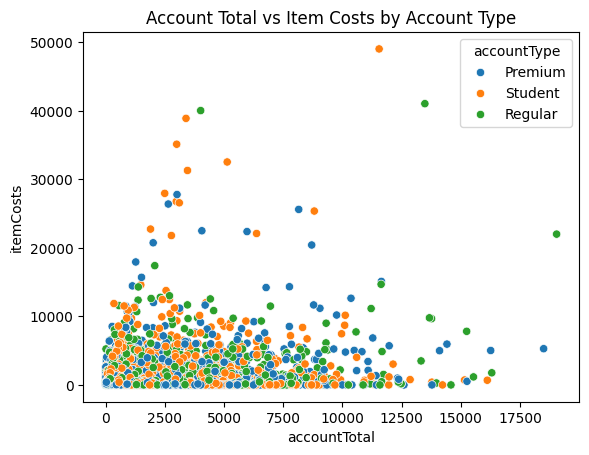

In [178]:
# Explore relationships between variables
sns.scatterplot(x='accountTotal', y='itemCosts', hue='accountType', data=shopeasy_df)
plt.title('Account Total vs Item Costs by Account Type')
plt.show()


## Encoding categorical features

We encode the categorical features 'location' and 'accountType' because clustering algorithms require numerical inputs.

'location' is a nominal categorical feature with no inherent order.
For enconding 'location' we use One-Hot Encoding to prevent the introduction of artificial ordinality.

'accountType' is an ordinal categorical variable with a meaningful order.
For enconding 'accountType' we use Label Encoding to preserve the inherent order.



In [179]:
# One-hot encoding for 'location'
shopeasy_df_encoded = pd.get_dummies(shopeasy_df, columns=['location'])

# Label encoding for 'accountType'
le = LabelEncoder()
shopeasy_df_encoded['accountType_encoded'] = le.fit_transform(shopeasy_df_encoded['accountType'])

# Drop the original 'accountType' column
shopeasy_df_encoded.drop(['accountType'], axis=1, inplace=True)

# Display the first five rows of the encoded dataframe
shopeasy_df_encoded.head()

accountTotal  frequencyIndex  itemCosts  singleItemCosts  \
0   1034.660626        0.833333    1308.11          1308.11   
1    777.853474        0.666667       0.00             0.00   
2     97.453056        0.818182     334.73           334.73   
3      0.000000        0.000000      12.65             0.00   
4     18.120946        0.500000      57.00            57.00   

   multipleItemCosts  emergencyFunds  itemBuyFrequency  \
0               0.00      234.602843          0.500000   
1               0.00     1820.143378          0.000000   
2               0.00       19.551802          0.083333   
3              12.65        0.000000          0.083333   
4               0.00        0.000000          0.166667   

   singleItemBuyFrequency  multipleItemBuyFrequency  emergencyUseFrequency  \
0                0.500000                  0.000000               0.166667   
1                0.000000                  0.000000               0.500000   
2                0.083333                  0.000000               0.083333   
3                0.000000                  0.083333               0.000000   
4                0.166667                  0.000000               0.000000   

   ...  maxSpendLimit  monthlyPaid  leastAmountPaid  paymentCompletionRate  \
0  ...         1500.0   236.764555       207.007715                   0.00   
1  ...         2000.0    89.741508         0.000000                   0.00   
2  ...         2500.0   234.271939       334.730000                   0.25   
3  ...         5000.0     0.000000         0.000000                   0.00   
4  ...         1500.0   118.438703        57.000000                   0.00   

   accountLifespan  webUsage  location_Chicago  location_Los Angeles  \
0                6        60             False                 False   
1                6         5             False                  True   
2               12        21             False                 False   
3               12        53              True                 False   
4                6        59             False                 False   

   location_New York  accountType_encoded  
0               True                    0  
1              False                    0  
2               True                    2  
3              False                    0  
4               True                    0  

[5 rows x 22 columns]

## Scaling numerical features

We scale numerical features to ensure that all features contribute equally to the distance calculations; leading to more accurate, interpretable, and meaningful clusters. 

In [180]:
# Select columns to scale (excluding one-hot encoded and label encoded columns)
columns_to_scale = [col for col in shopeasy_df.columns if (col != 'location' and col != 'accountType')]

# Initialize StandardScaler
scaler = StandardScaler()

# Create a new dataframe for the scaled version
shopeasy_df_scaled = shopeasy_df_encoded.copy()
shopeasy_df_scaled[columns_to_scale] = scaler.fit_transform(shopeasy_df_encoded[columns_to_scale])

# Display the first five rows of the scaled and encoded dataframe
shopeasy_df_scaled.head()


accountTotal  frequencyIndex  itemCosts  singleItemCosts  \
0     -0.254545       -0.185477   0.142711         0.431181   
1     -0.377926       -0.889033  -0.469552        -0.356934   
2     -0.704819       -0.249434  -0.312881        -0.155265   
3     -0.751640       -3.703271  -0.463631        -0.356934   
4     -0.742934       -1.592594  -0.442873        -0.322592   

   multipleItemCosts  emergencyFunds  itemBuyFrequency  \
0          -0.454576       -0.354913          0.024043   
1          -0.454576        0.401170         -1.221758   
2          -0.454576       -0.457462         -1.014125   
3          -0.440587       -0.466786         -1.014125   
4          -0.454576       -0.466786         -0.806490   

   singleItemBuyFrequency  multipleItemBuyFrequency  emergencyUseFrequency  \
0                0.997395                 -0.916995               0.157527   
1               -0.678661                 -0.916995               1.823274   
2               -0.399319                 -0.916995              -0.258913   
3               -0.678661                 -0.707313              -0.675349   
4               -0.119974                 -0.916995              -0.675349   

   ...  maxSpendLimit  monthlyPaid  leastAmountPaid  paymentCompletionRate  \
0  ...      -0.822957    -0.516902        -0.194497              -0.525551   
1  ...      -0.685536    -0.567688        -0.300354              -0.525551   
2  ...      -0.548114    -0.517763        -0.129185               0.329200   
3  ...       0.138993    -0.598688        -0.300354              -0.525551   
4  ...      -0.822957    -0.557775        -0.271206              -0.525551   

   accountLifespan  webUsage  location_Chicago  location_Los Angeles  \
0        -4.122768  0.367188             False                 False   
1        -4.122768 -1.542096             False                  True   
2         0.360680 -0.986668             False                 False   
3         0.360680  0.124188              True                 False   
4        -4.122768  0.332473             False                 False   

   location_New York  accountType_encoded  
0               True                    0  
1              False                    0  
2               True                    2  
3              False                    0  
4               True                    0  

[5 rows x 22 columns]

## Clustering

Given the nature of the problem ShopEasy is facing – understanding buying habits and behaviors to provide a personalized shopping experience – this is a clustering problem. Clustering is a type of unsupervised learning used to group data points without predefined labels into clusters based on their similarities. In this context, clustering can be used to segment customers into different groups based on their purchasing patterns, preferences, and demographic data. This segmentation can then guide ShopEasy in tailoring their marketing strategies, product recommendations, and special promotions to meet the specific needs and preferences of each customer group.

### DBSCAN

In [181]:
itemcost_acctot = shopeasy_df_scaled[['itemCosts', 'accountTotal']]
itemcost, acctot = shopeasy_df_scaled.itemCosts, shopeasy_df_scaled.accountTotal
plt.style.use('seaborn')
plt.scatter(itemcost, acctot)

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
from sklearn.cluster import DBSCAN

X = itemcost_acctot.to_numpy()

dbscan_cluster_model = DBSCAN().fit(X)
dbscan_cluster_model

DBSCAN()

In [ ]:
shopeasy_df_scaled['cluster'] = dbscan_cluster_model.labels_
shopeasy_df_scaled.head()

accountTotal  frequencyIndex  itemCosts  singleItemCosts  \
0     -0.254545       -0.185477   0.142711         0.431181   
1     -0.377926       -0.889033  -0.469552        -0.356934   
2     -0.704819       -0.249434  -0.312881        -0.155265   
3     -0.751640       -3.703271  -0.463631        -0.356934   
4     -0.742934       -1.592594  -0.442873        -0.322592   

   multipleItemCosts  emergencyFunds  itemBuyFrequency  \
0          -0.454576       -0.354913          0.024043   
1          -0.454576        0.401170         -1.221758   
2          -0.454576       -0.457462         -1.014125   
3          -0.440587       -0.466786         -1.014125   
4          -0.454576       -0.466786         -0.806490   

   singleItemBuyFrequency  multipleItemBuyFrequency  emergencyUseFrequency  \
0                0.997395                 -0.916995               0.157527   
1               -0.678661                 -0.916995               1.823274   
2               -0.399319                 -0.916995              -0.258913   
3               -0.678661                 -0.707313              -0.675349   
4               -0.119974                 -0.916995              -0.675349   

   ...  monthlyPaid  leastAmountPaid  paymentCompletionRate  accountLifespan  \
0  ...    -0.516902        -0.194497              -0.525551        -4.122768   
1  ...    -0.567688        -0.300354              -0.525551        -4.122768   
2  ...    -0.517763        -0.129185               0.329200         0.360680   
3  ...    -0.598688        -0.300354              -0.525551         0.360680   
4  ...    -0.557775        -0.271206              -0.525551        -4.122768   

   webUsage  location_Chicago  location_Los Angeles  location_New York  \
0  0.367188             False                 False               True   
1 -1.542096             False                  True              False   
2 -0.986668             False                 False               True   
3  0.124188              True                 False              False   
4  0.332473             False                 False               True   

   accountType_encoded  cluster  
0                    0        0  
1                    0        0  
2                    2        0  
3                    0        0  
4                    0        0  

[5 rows x 23 columns]

In [ ]:
shopeasy_df_scaled['cluster'].value_counts()

cluster
 0    8893
-1      57
Name: count, dtype: int64

In [ ]:
import plotly.express as px

fig = px.scatter(shopeasy_df_scaled, x='itemCosts', y='accountTotal', color='cluster')

fig.show()

In [ ]:
from sklearn.metrics import silhouette_score as ss

ss(X, shopeasy_df_scaled['cluster'])

0.8533491041331932

In [ ]:
epsilon = np.linspace(0.01, 1, num = 15)
epsilon

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [ ]:
min_samples = np.arange(2, 20, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [ ]:
import itertools

combinations = list(itertools.product(epsilon, min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [ ]:
N = len(combinations)
N

90

In [ ]:
def get_scores_and_labels(combinations, X):
    scores = []
    all_labels_list = []

    for i, (eps, min_samples) in enumerate(combinations):
        dbscan_cluster_model = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -= 1

        if (num_clusters < 2) or (num_clusters > 50):
            scores.append(-10)
            all_labels_list.append('bad')
            c = (eps, min_samples)
            print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving On")
            continue

        scores.append(ss(X, labels))
        all_labels_list.append(labels)
        print(f"Index: {i}, Score: {scores[i]},Labels: {all_labels_list[-1]}, Number of clusters: {num_clusters}")
        
    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]

    return {'best_epsilon': best_parameters[0],
            'best_min_samples': best_parameters[1], 
            'best_score': best_score, 
            'best_labels': best_labels}

best_dict = get_scores_and_labels(combinations, X)

Combination (0.01, 2) on iteration 1 of 90 has 648 clusters. Moving On
Combination (0.01, 5) on iteration 2 of 90 has 97 clusters. Moving On
Index: 2, Score: -0.6306659669502529,Labels: [-1  0  0 ...  0 -1 -1], Number of clusters: 28
Index: 3, Score: -0.5125430964919441,Labels: [-1  0  1 ...  0 -1 -1], Number of clusters: 19
Index: 4, Score: -0.2330095550410779,Labels: [-1  0 -1 ...  0 -1 -1], Number of clusters: 14
Index: 5, Score: -0.3019670187939948,Labels: [-1  0 -1 ...  9 -1 -1], Number of clusters: 12
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 108 clusters. Moving On
Index: 7, Score: 0.16075536926599382,Labels: [0 0 0 ... 0 0 0], Number of clusters: 22
Index: 8, Score: 0.12824450775889962,Labels: [0 0 0 ... 0 0 0], Number of clusters: 13
Index: 9, Score: 0.05735343908298687,Labels: [0 0 0 ... 0 0 0], Number of clusters: 7
Index: 10, Score: 0.03401056052271579,Labels: [0 0 0 ... 0 0 0], Number of clusters: 7
Index: 11, Score: 0.0042230721845474,Labels: [0 0 0 ..

In [ ]:
best_dict

{'best_epsilon': 0.9292857142857143,
 'best_min_samples': 5,
 'best_score': 0.8769225198746073,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}

In [ ]:
shopeasy_df_scaled['cluster'] = best_dict['best_labels']

shopeasy_df_scaled['cluster'].value_counts()

cluster
 0    8916
-1      29
 1       5
Name: count, dtype: int64

In [ ]:
fig = px.scatter(shopeasy_df_scaled, x='itemCosts', y='accountTotal', color='cluster')

fig.show()

In [ ]:
X2 = shopeasy_df_scaled[['itemBuyFrequency', 'itemCosts']].to_numpy()
X2

array([[ 0.02404259,  0.14271143],
       [-1.22175806, -0.46955188],
       [-1.01412545, -0.31288089],
       ...,
       [-1.22175806, -0.46955188],
       [-1.01412545, -0.3993441 ],
       [-0.80649035, -0.41518766]])

In [ ]:
best_dict2 = get_scores_and_labels(combinations, X2)
best_dict2

Combination (0.01, 2) on iteration 1 of 90 has 378 clusters. Moving On
Combination (0.01, 5) on iteration 2 of 90 has 114 clusters. Moving On
Combination (0.01, 8) on iteration 3 of 90 has 81 clusters. Moving On
Combination (0.01, 11) on iteration 4 of 90 has 52 clusters. Moving On
Index: 4, Score: 0.1399133336841861,Labels: [-1  0  1 ...  0  1  2], Number of clusters: 38
Index: 5, Score: 0.11800050864561401,Labels: [-1  0  1 ...  0  2  3], Number of clusters: 30
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 61 clusters. Moving On
Index: 7, Score: 0.2832825614709134,Labels: [0 1 2 ... 1 2 2], Number of clusters: 16
Index: 8, Score: 0.27917692661708243,Labels: [0 1 2 ... 1 2 2], Number of clusters: 11
Index: 9, Score: 0.26749227880890314,Labels: [0 1 2 ... 1 2 2], Number of clusters: 12
Index: 10, Score: 0.23415175199131558,Labels: [0 1 2 ... 1 2 2], Number of clusters: 12
Index: 11, Score: 0.2509566114073739,Labels: [0 1 2 ... 1 2 2], Number of clusters: 12
Index: 12, S

{'best_epsilon': 0.505,
 'best_min_samples': 5,
 'best_score': 0.8487126366045972,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}

In [ ]:
shopeasy_df_scaled['cluster2'] = best_dict2['best_labels']
shopeasy_df_scaled['cluster2'].value_counts()
fig = px.scatter(shopeasy_df_scaled, x='itemBuyFrequency', y='itemCosts', color='cluster2')

fig.show()